In [104]:
import os
import sys
from pathlib import Path

root = Path(os.getcwd()).parent
sys.path.append(str(root))

import pandas as pd

df = pd.read_csv("../data/morphology_data_cleaned.csv")
df.head()

df_ge = pd.read_excel("../data/morphology_data.xlsx", sheet_name="morphology_EQ_Geneva")
df_bz = pd.read_excel(
    "../data/morphology_EQ_BernZurich.xlsx", sheet_name="morphology_EQ_BernZurich"
)
df.head()

,id,left,top,right,bottom,row_index,col_index,PC1,PC2,PC3,...,z_distance,q_cluster,lst_mean,solar_summ,solar_wint,pm10_mean,pm25_mean,no2_mean,noiseday_m,noisenight
0,36,2497723.99,1118389.101,2497973.99,1118139.101,10,1,0.526055,0.338480,0.846051,...,1.908847,"(1.48,2]",-0.111053,1.130211,0.982144,-1.361464,-1.464034,-1.538696,-1.409763,-1.450883
1,37,2497723.99,1118139.101,2497973.99,1117889.101,11,1,0.851423,0.674067,0.542860,...,1.991855,"(1.48,2]",-0.938424,2.487577,3.365157,-1.704048,-1.595468,-2.022383,-0.495672,-0.757194
2,38,2497723.99,1117889.101,2497973.99,1117639.101,12,1,-0.752449,0.148228,-0.399779,...,1.508769,"(1.48,2]",-0.203460,0.316603,0.189124,-0.324336,-0.225750,-0.250166,0.247978,0.128687
3,39,2497723.99,1117639.101,2497973.99,1117389.101,13,1,1.066390,-0.858294,0.524694,...,1.734780,"(1.48,2]",-1.182843,-1.851830,-1.670012,-1.161430,-0.534386,-0.854209,-0.072170,-0.152906
4,40,2497723.99,1117389.101,2497973.99,1117139.101,14,1,-0.433673,-0.642512,-0.056089,...,1.434109,"(0.312,1.48]",1.315675,0.750611,0.710263,-0.706488,-0.378117,-0.830912,0.762563,0.617922


In [105]:
df = pd.concat([df_ge, df_bz], ignore_index=True)
df.head()

,id,left,top,right,bottom,row_index,col_index,field_1,PC1,PC2,...,noiseday_m,noisenight,bin_lst_me,bin_solar_,bin_sola_1,bin_pm10_m,bin_pm25_m,bin_no2_me,bin_noised,bin_noisen
0,36,2497723.99,1118389.101,2497973.99,1118139.101,10,1,1343,0.526055,0.338480,...,-1.409763,-1.450883,"(-0.699,-0.0567]","(0.658,2.84]","(0.529,3.4]","(-2.17,-0.717]","(-1.73,-0.731]","(-2.33,-0.72]","(-2.7,-0.657]","(-2.55,-0.65]"
1,37,2497723.99,1118139.101,2497973.99,1117889.101,11,1,1344,0.851423,0.674067,...,-0.495672,-0.757194,"(-2.4,-0.699]","(0.658,2.84]","(0.529,3.4]","(-2.17,-0.717]","(-1.73,-0.731]","(-2.33,-0.72]","(-0.657,0.0621]","(-2.55,-0.65]"
2,38,2497723.99,1117889.101,2497973.99,1117639.101,12,1,1345,-0.752449,0.148228,...,0.247978,0.128687,"(-0.699,-0.0567]","(-0.0457,0.658]","(-0.31,0.529]","(-0.717,-0.162]","(-0.731,-0.152]","(-0.72,-0.0796]","(0.0621,0.737]","(0.106,0.611]"
3,39,2497723.99,1117639.101,2497973.99,1117389.101,13,1,1346,1.066390,-0.858294,...,-0.072170,-0.152906,"(-2.4,-0.699]","(-2.51,-0.611]","(-1.71,-0.722]","(-2.17,-0.717]","(-0.731,-0.152]","(-2.33,-0.72]","(-0.657,0.0621]","(-0.65,0.106]"
4,40,2497723.99,1117389.101,2497973.99,1117139.101,14,1,1347,-0.433673,-0.642512,...,0.762563,0.617922,"(0.716,2.72]","(0.658,2.84]","(0.529,3.4]","(-0.717,-0.162]","(-0.731,-0.152]","(-2.33,-0.72]","(0.737,2.34]","(0.611,2.66]"


In [106]:
df.dropna(inplace=True)
k_means_target = df["typology"]
df["city"] = df["city"].astype("category").cat.codes
print(sorted(k_means_target.unique()))
df.columns

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']


Index(['id', 'left', 'top', 'right', 'bottom', 'row_index', 'col_index',
       'field_1', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'typology', 'city',
       'z_distance', 'q_cluster', 'lst_mean', 'solar_summ', 'solar_wint',
       'pm10_mean', 'pm25_mean', 'no2_mean', 'noiseday_m', 'noisenight',
       'bin_lst_me', 'bin_solar_', 'bin_sola_1', 'bin_pm10_m', 'bin_pm25_m',
       'bin_no2_me', 'bin_noised', 'bin_noisen'],
      dtype='object')

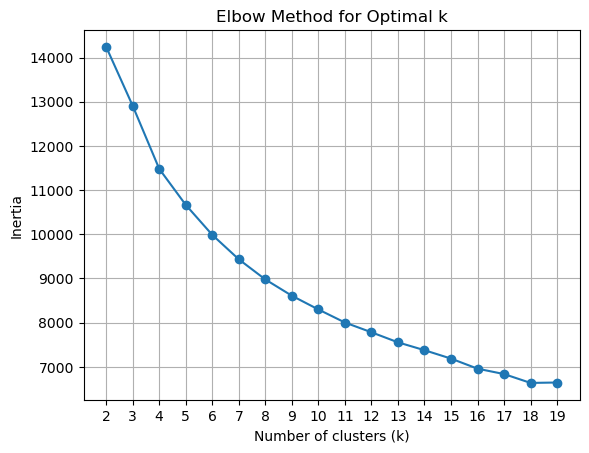

In [107]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

columns_to_use = [
    "lst_mean",
    "solar_summ",
    "solar_wint",
    "pm10_mean",
    "pm25_mean",
    "no2_mean",
    "noiseday_m",
    "noisenight",
    "z_distance",
]

# K-Means clustering for k=2 to k=10, also plot the elbow curve

inertias = []
k_max = 20

for k in range(2, k_max):
    kmeans = KMeans(n_clusters=k, random_state=42)
    df[f"kmeans_{k}"] = kmeans.fit_predict(df[columns_to_use])
    inertia = kmeans.inertia_
    inertias.append(inertia)

plt.plot(range(2, k_max), inertias, marker="o")
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.xticks(range(2, k_max))
plt.grid()
plt.show()

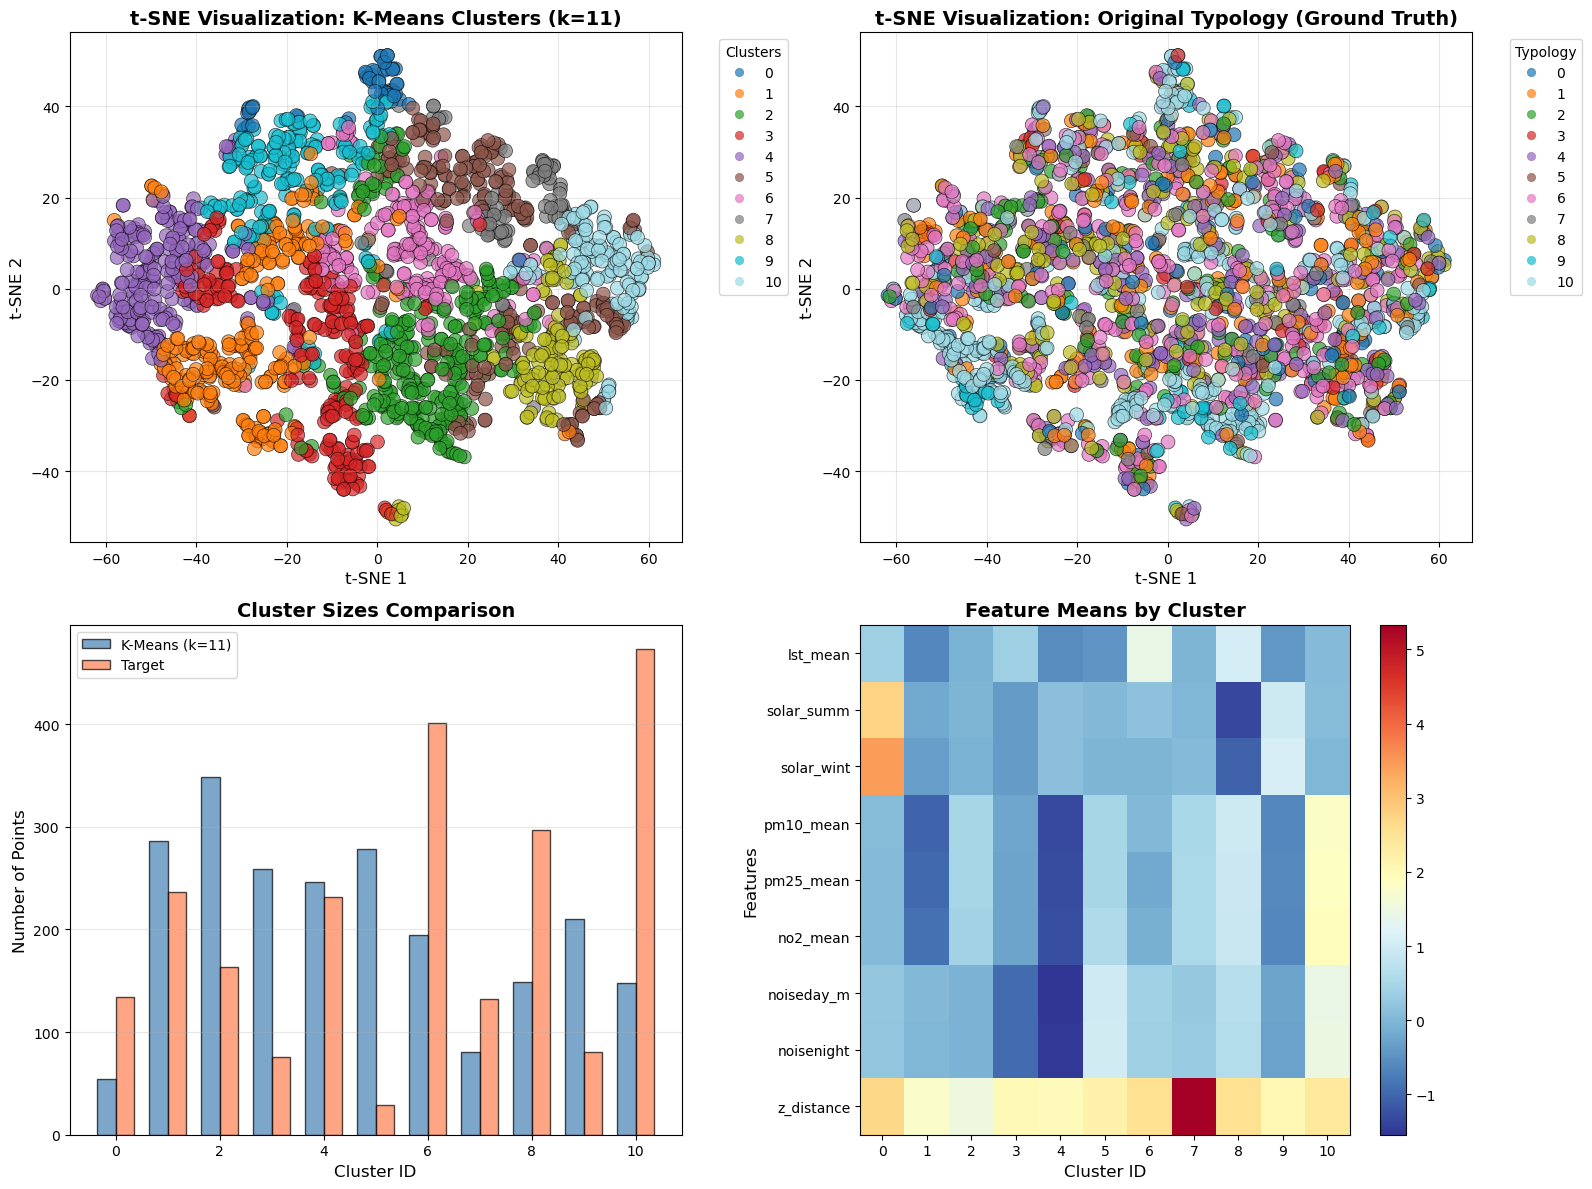

CLUSTERING QUALITY MEASURES (k=11)
Silhouette Score:         0.1394 (higher is better, range: [-1, 1])
Calinski-Harabasz Score:  331.8603 (higher is better)
Davies-Bouldin Score:     1.5565 (lower is better)

CLUSTER STATISTICS

Cluster 0: 54 points (2.4%)
----------------------------------------
  lst_mean    :    0.387 ±  0.906
  solar_summ  :    2.738 ±  1.382
  solar_wint  :    3.429 ±  1.435
  pm10_mean   :    0.093 ±  0.921
  pm25_mean   :    0.048 ±  0.901
  no2_mean    :    0.049 ±  0.825
  noiseday_m  :    0.230 ±  0.847
  noisenight  :    0.217 ±  0.864
  z_distance  :    2.696 ±  1.110

Cluster 1: 286 points (12.7%)
----------------------------------------
  lst_mean    :   -0.622 ±  0.653
  solar_summ  :   -0.195 ±  0.665
  solar_wint  :   -0.334 ±  0.536
  pm10_mean   :   -1.009 ±  0.464
  pm25_mean   :   -0.963 ±  0.488
  no2_mean    :   -0.877 ±  0.368
  noiseday_m  :    0.037 ±  0.552
  noisenight  :   -0.000 ±  0.554
  z_distance  :    1.775 ±  0.747

Cluster 2: 348 po

In [ ]:
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
)
from sklearn.manifold import TSNE
import numpy as np

k_selected = 11

# t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df[columns_to_use])
df["tsne_1"] = tsne_results[:, 0]
df["tsne_2"] = tsne_results[:, 1]

if k_means_target.dtype == "object":
    k_means_target = k_means_target.astype("category").cat.codes

# 1. Create a figure with multiple subplots for better visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: t-SNE with k=11 clusters (colored by cluster)
scatter1 = axes[0, 0].scatter(
    df["tsne_1"],
    df["tsne_2"],
    c=df[f"kmeans_{k_selected}"],
    cmap="tab20",
    s=100,
    alpha=0.7,
    edgecolors="black",
    linewidth=0.5,
)
axes[0, 0].set_title(
    f"t-SNE Visualization: K-Means Clusters (k={k_selected})",
    fontsize=14,
    fontweight="bold",
)
axes[0, 0].set_xlabel("t-SNE 1", fontsize=12)
axes[0, 0].set_ylabel("t-SNE 2", fontsize=12)
legend1 = axes[0, 0].legend(
    *scatter1.legend_elements(),
    title="Clusters",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    ncol=1,
)
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: t-SNE with original typology (ground truth)
scatter2 = axes[0, 1].scatter(
    df["tsne_1"],
    df["tsne_2"],
    c=k_means_target,
    cmap="tab20",
    s=100,
    alpha=0.7,
    edgecolors="black",
    linewidth=0.5,
)
axes[0, 1].set_title(
    "t-SNE Visualization: Original Typology (Ground Truth)",
    fontsize=14,
    fontweight="bold",
)
axes[0, 1].set_xlabel("t-SNE 1", fontsize=12)
axes[0, 1].set_ylabel("t-SNE 2", fontsize=12)
legend2 = axes[0, 1].legend(
    *scatter2.legend_elements(),
    title="Typology",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    ncol=1,
)
axes[0, 1].grid(True, alpha=0.3)

# Plot also the cluster sizes of the target clustering and the feature means per cluster
# Plot 3: Cluster sizes comparison (K-means vs Target)
cluster_sizes_kmeans = df[f"kmeans_{k_selected}"].value_counts().sort_index()
target_sizes = k_means_target.value_counts().sort_index()

x = np.arange(max(len(cluster_sizes_kmeans), len(target_sizes)))
width = 0.35

bars1 = axes[1, 0].bar(
    cluster_sizes_kmeans.index - width / 2,
    cluster_sizes_kmeans.values,
    width,
    label=f"K-Means (k={k_selected})",
    color="steelblue",
    edgecolor="black",
    alpha=0.7,
)
bars2 = axes[1, 0].bar(
    target_sizes.index + width / 2,
    target_sizes.values,
    width,
    label="Target",
    color="coral",
    edgecolor="black",
    alpha=0.7,
)

axes[1, 0].set_title(f"Cluster Sizes Comparison", fontsize=14, fontweight="bold")
axes[1, 0].set_xlabel("Cluster ID", fontsize=12)
axes[1, 0].set_ylabel("Number of Points", fontsize=12)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis="y")


# Plot 4: Cluster feature means heatmap
feature_cols = columns_to_use
cluster_means = df.groupby(f"kmeans_{k_selected}")[feature_cols].mean()
im = axes[1, 1].imshow(cluster_means.T, cmap="RdYlBu_r", aspect="auto")
axes[1, 1].set_title("Feature Means by Cluster", fontsize=14, fontweight="bold")
axes[1, 1].set_xlabel("Cluster ID", fontsize=12)
axes[1, 1].set_ylabel("Features", fontsize=12)
axes[1, 1].set_xticks(range(len(cluster_means)))
axes[1, 1].set_yticks(range(len(feature_cols)))
axes[1, 1].set_yticklabels(feature_cols)
plt.colorbar(im, ax=axes[1, 1])

plt.tight_layout()
plt.show()